In [4]:
a = sample_matrices(6)[1000]
random_row(a)

array([-1., -1.,  1.,  1.,  1.,  1.])

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import time
plt.rc('text', usetex=True)

def sample_matrices(d):
    """Sample matrices A from {+-1}^{d/2 x d}."""
    rows = d // 2
    return np.array(list(product([-1, 1], repeat=rows * d))).reshape(-1, rows, d)

def random_convex_combination(A):
    """Choose a random vector in the convex combination of the rows of A."""
    rows = A.shape[0]
    weights = np.random.dirichlet(np.ones(rows))
    return np.dot(weights, A)

def random_row(A):
    rows = A.shape[0]
    ind = np.zeros(rows)
    ind[np.random.randint(rows)] = 1
    return np.dot(ind, A)

def count_matrices_containing_vector(matrices, target_vector):
    """Count the number of matrices A whose span contains the target vector."""
    count = 0
    
    for A in matrices:
        combined_matrix = np.vstack([A, np.expand_dims(target_vector, axis=0)])
        r1 = np.linalg.matrix_rank(A)
        r2 = np.linalg.matrix_rank(combined_matrix)
        if r1 == r2:
            count += 1
            
    return count

In [5]:
def results(dimensions):
    '''Count the number of matrices containing the target vector for each dimension.'''
    num_trials = 3

    row_counts = []
    conv_counts = []
    stds = []

    for d in dimensions:
        S = sample_matrices(d)

        row_curr = []
        conv_curr = []
        for i in range(num_trials):
            A = S[np.random.randint(S.shape[0])]

            c = random_convex_combination(A)
            conv_curr.append(count_matrices_containing_vector(S, c))

            r = random_row(A)
            row_curr.append(count_matrices_containing_vector(S, r))

        conv_counts.append(conv_curr)
        row_counts.append(row_curr)

        print(f"Dimension {d} : {np.mean(conv_counts[-1]) / 2**(d * (d // 2))}")

    return row_counts, conv_counts

# Example usage
dimensions = [2, 3, 4, 5, 6]
row_counts, conv_counts = results(dimensions)

Dimension 2 : 0.5
Dimension 3 : 0.25
Dimension 4 : 0.03125
Dimension 5 : 0.0078125
Dimension 6 : 0.00054931640625


In [11]:
from math import log2

def plot_count_scale(dimensions, row_counts, conv_counts):
    # normalize counts
    normalized_row_counts = [
        [c / 2**(d * (d // 2)) for c in cnt] \
            for d, cnt in zip(dimensions, row_counts)
    ]
    normalized_conv_counts = [
        [c / 2**(d * (d // 2)) for c in cnt] \
            for d, cnt in zip(dimensions, conv_counts)
    ]

    mean_row_counts = [log2(np.mean(cnt)) for cnt in normalized_row_counts]
    # std_row_counts = [np.std(cnt) for cnt in normalized_row_counts]
    mean_conv_counts = [log2(np.mean(cnt)) for cnt in normalized_conv_counts]
    # std_conv_counts = [np.mean(cnt) for cnt in normalized_conv_counts]
    
    # labels
    plt.xlabel('Dimension')
    plt.ylabel(r'$\# / 2^{d(d/2)}$')
    plt.title(r'Fraction of matrices with $g$ in span')

    # plot showing how fraction decreases
    plt.errorbar(dimensions, mean_row_counts, fmt='o', color='black')
    plt.errorbar(dimensions, mean_conv_counts, fmt='^', color='red')
    # plt.errorbar(dimensions, mean_row_counts, yerr=std_row_counts, fmt='o', color='black')
    # plt.errorbar(dimensions, mean_conv_counts, yerr=std_conv_counts, fmt='^', color='red')

    # plot results
    plt.show()

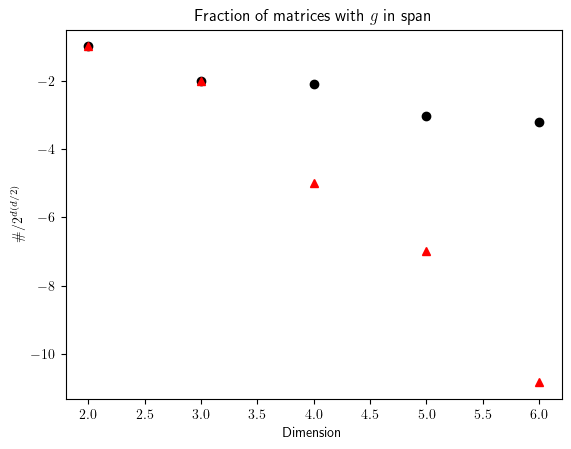

In [12]:
plot_count_scale(dimensions, row_counts, conv_counts)